## Everything, Everywhere, All at Once:
### A study in finding the hidden stories in chaotic datasets
**Scenario:**<br><br>
As data anlystis, we were tasked by some big movie executives to help them determine what kind of movie they should be working on next. Based on IMDb data we are looking to discover trends and relationships in the data that can help guide decisions on which project the movie studio should make next.

### Questions for which we seek answers:
1. How do movie genre trends change over time?<br>
2. Actors impacts on ratings count and average<br>
3. How popular are movies broken down by vote count?<br>
4. Do certain genres receive more votes or get better ratings?<br>
5. Do any correlations exist between movies aspects (e.g. Total Votes, Ratings, Runtime, etc.)

### Sections:
* [Exploratory Data Analysis](#eda)
* [Data Cleaning](#data-cleaning)

#### Exploratory Data Analysis <a class="anchor" id="eda"></a>

First we need to import our libraries and dataframes we will be working with from IMDb.

In [61]:
import pandas as pd
import seaborn as sns

In [62]:
import warnings
warnings.filterwarnings('ignore')

In [63]:
basics_df = pd.read_csv('Data/title.basics.tsv', sep='\t')
ratings_df = pd.read_csv('Data/title.ratings.tsv', sep='\t')

In [64]:
names_df = pd.read_csv('Data/name.basics.tsv', sep='\t')
principals_df = pd.read_csv('Data/title.principals.tsv', sep='\t')

We begin by looking at each data set to determine the datatypes and information available.

In [65]:
ratings_df.head()

,tconst,averageRating,numVotes
0,tt0000001,5.7,2064
1,tt0000002,5.6,279
2,tt0000003,6.5,2038
3,tt0000004,5.4,180
4,tt0000005,6.2,2799


In [66]:
principals_df.head()

,tconst,ordering,nconst,category,job,characters
0,tt0000001,1,nm1588970,self,\N,"[""Self""]"
1,tt0000001,2,nm0005690,director,\N,\N
2,tt0000001,3,nm0005690,producer,producer,\N
3,tt0000001,4,nm0374658,cinematographer,director of photography,\N
4,tt0000002,1,nm0721526,director,\N,\N


In [67]:
names_df.head()

,nconst,primaryName,birthYear,deathYear,primaryProfession,knownForTitles
0,nm0000001,Fred Astaire,1899,1987,"actor,miscellaneous,producer","tt0072308,tt0050419,tt0053137,tt0027125"
1,nm0000002,Lauren Bacall,1924,2014,"actress,soundtrack,archive_footage","tt0037382,tt0075213,tt0117057,tt0038355"
2,nm0000003,Brigitte Bardot,1934,\N,"actress,music_department,producer","tt0057345,tt0049189,tt0056404,tt0054452"
3,nm0000004,John Belushi,1949,1982,"actor,writer,music_department","tt0072562,tt0077975,tt0080455,tt0078723"
4,nm0000005,Ingmar Bergman,1918,2007,"writer,director,actor","tt0050986,tt0083922,tt0050976,tt0069467"


The basics and ratings databases include a shared variable, so we can combine them

In [68]:
basics_ratings_df = basics_df.merge(ratings_df, how='inner', on='tconst')
basics_ratings_df.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short",5.7,2064
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short",5.6,279
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,\N,5,"Action,Adventure,Animation",6.5,2038
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,\N,12,"Animation,Short",5.4,180
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,"Comedy,Short",6.2,2799


### Data Cleaning <a class="anchor" id="data-cleaning"></a>
Cleaning the data for easier analysis and looking for the story

First, our clients are only looking for data on movies, so we can remove all other rows.

In [107]:
basics_ratings_df.titleType.unique()

array(['short', 'movie', 'tvShort', 'tvMovie', 'tvEpisode', 'tvSeries',
       'tvMiniSeries', 'tvSpecial', 'video', 'videoGame'], dtype=object)

In [108]:
movies_df = basics_ratings_df[basics_ratings_df.titleType == 'movie']

Then, we can determine variable types and correct as needed

In [109]:
movies_df.describe()

,averageRating,numVotes
count,314509.000000,3.145090e+05
mean,6.167837,3.621551e+03
std,1.360726,3.623180e+04
min,1.000000,5.000000e+00
25%,5.300000,1.900000e+01
50%,6.300000,6.100000e+01
75%,7.100000,3.130000e+02
max,10.000000,2.920364e+06


In [110]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 314509 entries, 8 to 1463604
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   tconst          314509 non-null  object 
 1   titleType       314509 non-null  object 
 2   primaryTitle    314509 non-null  object 
 3   originalTitle   314509 non-null  object 
 4   isAdult         314509 non-null  object 
 5   startYear       314509 non-null  object 
 6   endYear         314509 non-null  object 
 7   runtimeMinutes  314509 non-null  object 
 8   genres          314509 non-null  object 
 9   averageRating   314509 non-null  float64
 10  numVotes        314509 non-null  int64  
dtypes: float64(1), int64(1), object(9)
memory usage: 28.8+ MB


Creating a new column based off of decade to easily group data

In [111]:
def year_to_decade(x: str) -> str:
    x = x[0:3] + '0'
    return x

Converting strings to integers

In [112]:
def obj_to_int(x: str) -> int:
    x = int(x)
    return x

Removing null values and running the above functions

In [113]:
movies_df = movies_df[~(movies_df.runtimeMinutes == '\\N')]
movies_df = movies_df[~(movies_df.startYear  == '\\N')]
movies_df = movies_df[~(movies_df.genres  == '\\N')]
movies_df = movies_df[~(movies_df.averageRating  == '\\N')]
movies_df = movies_df[~(movies_df.numVotes  == '\\N')]
movies_df.runtimeMinutes = movies_df.runtimeMinutes.apply(obj_to_int)
movies_df['startYearInt'] = movies_df.startYear.apply(obj_to_int)
movies_df['decade'] = movies_df.startYear.apply(year_to_decade)

Removing outliers, any movies over 5 hours, and any movies with less than 100 rating votes

In [114]:
movies_df = movies_df[~(movies_df.runtimeMinutes > 300)]
movies_df = movies_df[movies_df.numVotes > 99]

Splitting the string of genres into a proper list

In [115]:
def genre_list(x:str) -> list:
    genre = x.split(',')
    return genre

Creating a new dataframe with just tconst and genres, to unwind and merge back into movies

In [116]:
genres_df = movies_df[['genres', 'tconst']]
genres_df.genres = genres_df.genres.apply(genre_list)

In [117]:
genres_df = genres_df.genres.apply(pd.Series) \
    .merge(genres_df, right_index = True, left_index = True) \
    .drop(['genres'], axis = 1) \
    .melt(id_vars = ['tconst'], value_name = 'genre') \
    .drop("variable", axis = 1) \
    .dropna()

In [118]:
genres_df.groupby('genre').count()

,tconst
genre,
Action,17393
Adult,815
Adventure,10204
Animation,3038
Biography,4805
Comedy,39544
Crime,15900
Documentary,11120
Drama,65964


Cleaning the genres, removing any that don't make sense for movies, that have too few entries, and combining related for easier to understand visualizations

In [129]:
genres_df = genres_df[~(genres_df.genre.isin(['Talk-Show', 'Reality-TV', 'News', 'Game-Show', 'Adult']))]

In [130]:
genres_df.genre = genres_df.genre.replace(['Thriller', 'Adventure'], 'Action')
genres_df.genre = genres_df.genre.replace(['History', 'Biography'], 'Documentary')
genres_df.genre = genres_df.genre.replace(['Sci-Fi', 'Fantasy'], 'Sci-Fi Fantasy')
genres_df.genre = genres_df.genre.replace(['Music'], 'Musical')
genres_df.genre = genres_df.genre.replace(['Film-Noir'], 'Mystery')
genres_df.drop_duplicates()

,tconst,genre
0,tt0000009,Romance
1,tt0000147,Documentary
2,tt0000574,Action
3,tt0001892,Drama
4,tt0001964,Drama
...,...,...
384418,tt9900782,Drama
384419,tt9900940,Action
384423,tt9904802,War
384427,tt9906262,Musical


Merging unwound genres back into movies

In [131]:
movies_genres_df = genres_df.merge(movies_df, how='left', on='tconst')

In [132]:
movies_genres_df

,tconst,genre,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes,startYearInt,decade
0,tt0000009,Romance,movie,Miss Jerry,Miss Jerry,0,1894,\N,45,Romance,5.4,212,1894,1890
1,tt0000147,Documentary,movie,The Corbett-Fitzsimmons Fight,The Corbett-Fitzsimmons Fight,0,1897,\N,100,"Documentary,News,Sport",5.2,520,1897,1890
2,tt0000574,Action,movie,The Story of the Kelly Gang,The Story of the Kelly Gang,0,1906,\N,70,"Action,Adventure,Biography",6.0,917,1906,1900
3,tt0001892,Drama,movie,Den sorte drøm,Den sorte drøm,0,1911,\N,53,Drama,5.8,270,1911,1910
4,tt0001964,Drama,movie,The Traitress,Die Verräterin,0,1911,\N,48,Drama,6.0,102,1911,1910
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
258387,tt9900940,Action,movie,Scrapper,The Scrapper,0,2021,\N,87,"Crime,Drama,Thriller",4.4,1462,2021,2020
258388,tt9904802,War,movie,Enemy Lines,Enemy Lines,0,2020,\N,92,"Action,Drama,War",4.6,1962,2020,2020
258389,tt9906262,Musical,movie,The Changin' Times of Ike White,The Changin' Times of Ike White,0,2019,\N,77,"Biography,Documentary,Music",6.7,230,2019,2010
258390,tt9907782,Mystery,movie,The Cursed,Eight for Silver,0,2021,\N,111,"Fantasy,Horror,Mystery",6.2,17743,2021,2020


Removing columns that we don't need

In [133]:
movies_genres_df = movies_genres_df.drop(['endYear', 'originalTitle', 'genres', 'titleType', 'isAdult', 'genres', 'startYear'], axis=1)

In [134]:
movies_genres_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 258392 entries, 0 to 258391
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   tconst          258392 non-null  object 
 1   genre           258392 non-null  object 
 2   primaryTitle    258392 non-null  object 
 3   runtimeMinutes  258392 non-null  int64  
 4   averageRating   258392 non-null  float64
 5   numVotes        258392 non-null  int64  
 6   startYearInt    258392 non-null  int64  
 7   decade          258392 non-null  object 
dtypes: float64(1), int64(3), object(4)
memory usage: 15.8+ MB


The "ordering" and "characters" columns don't provide value so we drop them.

In [127]:
principals_df = principals_df.drop(columns=(['ordering', 'characters']), axis=1)

KeyError: "['ordering', 'characters'] not found in axis"

Removing deceased actors or actresses as we can't make decisions based on people who can no longer make movies.

In [87]:
names_df = names_df[(names_df.deathYear == '\\N')]

Dropping the "deathYear" column because it no longer has any valid values.

In [88]:
names_df = names_df.drop(columns=['deathYear'], axis=1)

Ensuring any null values are dropped so we are only working with known values.

In [89]:
names_df = names_df.dropna(subset=['primaryName'])

Creates one column for a main profession to make data easier to analyze.

In [90]:
def main_profession(professions):
    professions_list = professions.split(sep=',')
    return professions_list[0]

names_df['mainProfession'] = names_df['primaryProfession'].apply(main_profession)

Determining which categories exist and which are important for analysis

In [91]:
principals_df['category'].unique()

array(['self', 'director', 'producer', 'cinematographer', 'composer',
       'editor', 'actor', 'actress', 'writer', 'production_designer',
       'archive_footage', 'casting_director', 'archive_sound'],
      dtype=object)

Removing less important categories to focus on those with the most impact to help drive analysis and decision making.

In [92]:
principals_simplified_df = principals_df[(principals_df['category'].isin(['director', 'actor', 'actress', 'writer']))]

Job category doesn't provide much value so that will be dropped as well

In [93]:
principals_cleaned_df = principals_simplified_df.drop(columns=(['job']), axis=1)

# Questions and Answers

#### 1. How do movie genre trends change over time?

In [94]:
movies_genres_df.sort_values('tconst')

,tconst,genre,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes,startYearInt,decade
0,tt0000009,Romance,movie,Miss Jerry,Miss Jerry,0,1894,\N,45,Romance,5.4,212,1894,1890
213918,tt0000147,Sport,movie,The Corbett-Fitzsimmons Fight,The Corbett-Fitzsimmons Fight,0,1897,\N,100,"Documentary,News,Sport",5.2,520,1897,1890
128147,tt0000147,News,movie,The Corbett-Fitzsimmons Fight,The Corbett-Fitzsimmons Fight,0,1897,\N,100,"Documentary,News,Sport",5.2,520,1897,1890
1,tt0000147,Documentary,movie,The Corbett-Fitzsimmons Fight,The Corbett-Fitzsimmons Fight,0,1897,\N,100,"Documentary,News,Sport",5.2,520,1897,1890
128148,tt0000574,Adventure,movie,The Story of the Kelly Gang,The Story of the Kelly Gang,0,1906,\N,70,"Action,Adventure,Biography",6.0,917,1906,1900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128144,tt9916190,Action,movie,Safeguard,Safeguard,0,2020,\N,95,"Action,Adventure,Thriller",3.6,258,2020,2020
259393,tt9916190,Thriller,movie,Safeguard,Safeguard,0,2020,\N,95,"Action,Adventure,Thriller",3.6,258,2020,2020
128145,tt9916270,Thriller,movie,Il talento del calabrone,Il talento del calabrone,0,2020,\N,84,Thriller,5.8,1491,2020,2020
128146,tt9916362,Drama,movie,Coven,Akelarre,0,2020,\N,92,"Drama,History",6.4,5866,2020,2020


<Axes: xlabel='startYearInt', ylabel='count'>

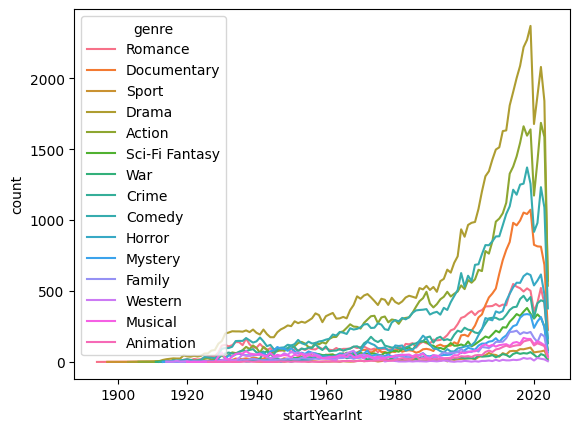

In [135]:
sns.lineplot(
    data=movies_genres_df.groupby(['startYearInt', 'genre']).size().reset_index(name='count'), x='startYearInt', y='count', hue='genre'
)

<Axes: xlabel='startYearInt', ylabel='genre'>

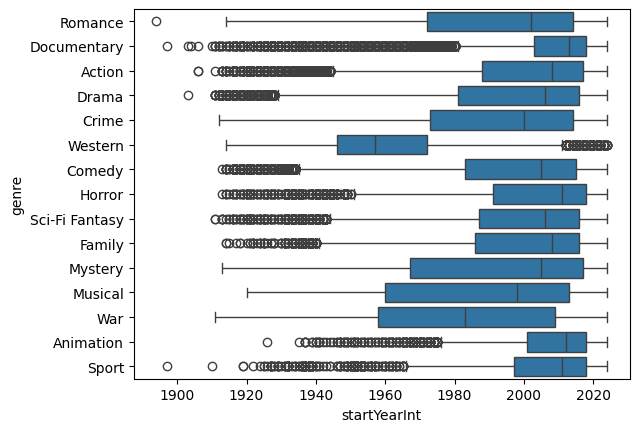

In [138]:
sns.boxplot(data=movies_genres_df, x='startYearInt', y='genre')

Movie genres tend to stay pretty consistent over time, there's some fluctuation, but over the century they have porportionally stayed fairly conssitent

#### 2. How do genres affect ratings?

In [136]:
movies_genres_df.groupby('genre')[['numVotes', 'averageRating']].mean().sort_values('numVotes', ascending=False)

,numVotes,averageRating
genre,,
Sci-Fi Fantasy,24598.350677,5.336664
Animation,22033.737986,6.281238
Action,20082.516788,5.531208
Mystery,14505.407343,5.755722
Crime,13808.417107,5.953925
Sport,8893.143627,6.361667
Drama,8715.497787,6.159678
Family,8677.242472,5.900313
Comedy,8653.715279,5.792368


In [137]:
movies_genres_df.groupby('genre')[['numVotes', 'averageRating']].mean().sort_values('averageRating', ascending=False)

,numVotes,averageRating
genre,,
Documentary,5988.025374,6.884711
War,8209.417476,6.411877
Musical,5646.679160,6.372147
Sport,8893.143627,6.361667
Animation,22033.737986,6.281238
Drama,8715.497787,6.159678
Romance,7347.000745,6.066718
Crime,13808.417107,5.953925
Family,8677.242472,5.900313


<Axes: xlabel='averageRating', ylabel='numVotes'>

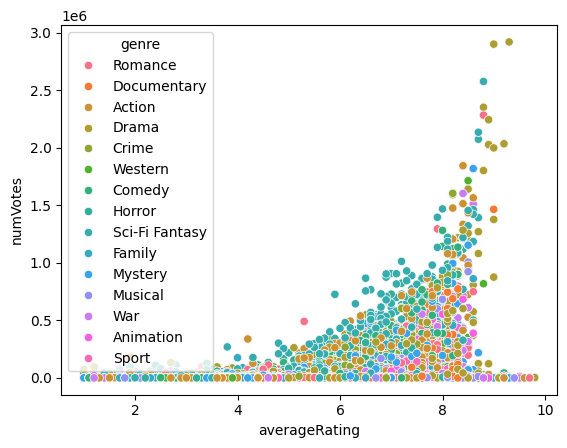

In [143]:
sns.scatterplot(data=movies_genres_df, x='averageRating', y='numVotes', hue='genre')